In [15]:
from sklearn.datasets import fetch_olivetti_faces
import sys
import matplotlib.pyplot as plt
import numpy as np
import importlib
import pickle
import os
from skimage.color import rgb2gray


In [16]:
def unravel_image(image):
    num_pixels = image.shape[0]*image.shape[1]
    image_vector = np.reshape(image,(num_pixels))
    return image_vector
def ravel_image_vec(image_vector,num_pixels_per_side):
    image = np.reshape(image_vector,(num_pixels_per_side,num_pixels_per_side),'F')
    image = image.T
    return image
def project_onto_eig_vecs(vec1,eig_vecs):
    #Recall that VV^T is the matrix of orthogonal projection.
    return eig_vecs@eig_vecs.T@vec1
    

## Output of graphs

In [210]:
graphs_dir = 'graphs/'

In [211]:
def plot_image_grid(images, 
                    title, 
                    image_shape=(64,64),
                    ncols=5,
                    nrows=2, 
                    bycol=0, 
                    row_titles=None,
                    col_titles=None,
                    save=False):
    fig,axes = plt.subplots(nrows=nrows,ncols=ncols,figsize=(2. * ncols, 2.26 * nrows))
    for i, image in enumerate(images):
        row,col = reversed(divmod(i,nrows)) if bycol else divmod(i,ncols) 
        if nrows==1:
            cax = axes[col]
        else:
            cax = axes[row,col]
        cax.imshow(image.reshape(image_shape), cmap='gray',
                   interpolation='nearest',
                   vmin=image.min(), vmax=image.max())
        cax.set_xticks(())
        cax.set_yticks(())
    if row_titles is not None :
        for ax,row in zip(axes[:,0],row_titles) :
            ax.set_ylabel(row,size='large')
    if col_titles is not None :
        for ax,col in zip(axes[0],col_titles) :
            ax.set_title(col)
    
    fig.suptitle(title)
    fig.tight_layout()
    plt.subplots_adjust(top=0.9)
    if save is True:
        plt.savefig(graphs_dir +title + '.pdf',bbox_inches='tight')
    plt.show()

# Load Data

In [212]:
eigen_pyramids_dir = '/scratch/awd275/context_encoder_pytorch_data/20200512_eigen_pyramids/'
orig_file=eigen_pyramids_dir+'celebA_1000_orig_eigen.p'
orig_cropped_file=eigen_pyramids_dir+'celebA_1000_orig_cropped_eigen.p'
recons_file=eigen_pyramids_dir+'celebA_1000_recons_eigen.p'
recons_cropped_file=eigen_pyramids_dir+'celebA_1000_recons_cropped_eigen.p'


# Make Graphs of "Eigenfaces"


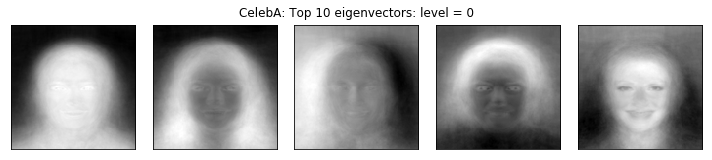

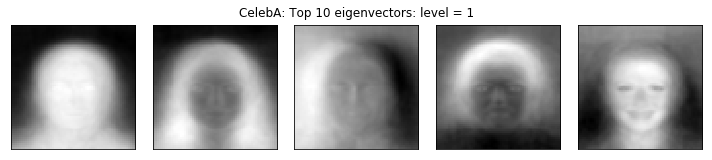

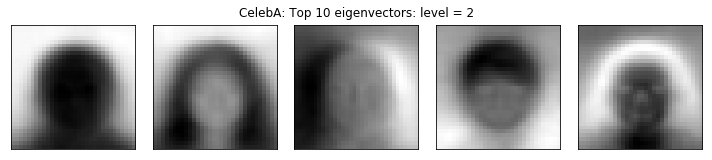

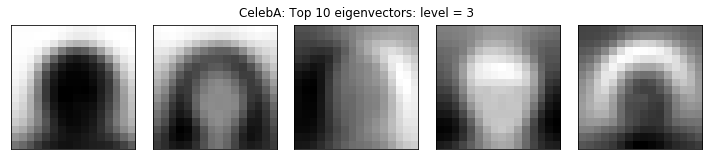

In [213]:
eig_val_vecs=pickle.load(open(orig_file,'rb'))
for level,_ in enumerate(eig_val_vecs):
    eig_vals = eig_val_vecs[level][0] 
    eig_vecs = eig_val_vecs[level][1] 
    images = eig_vecs[-5:] 
    images = np.flipud(images)
    plot_title = 'CelebA: ' + 'Top 10 eigenvectors: level = ' +str(level)
    plot_image_grid(images,plot_title ,image_shape=eig_vecs[0].shape,nrows=1,ncols=5)


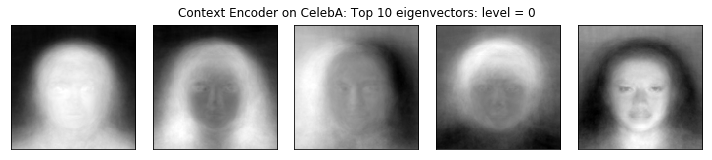

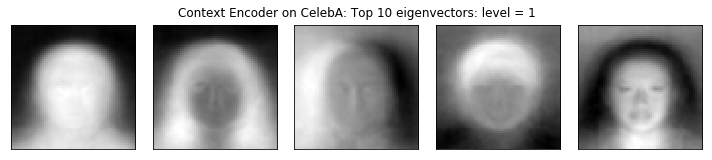

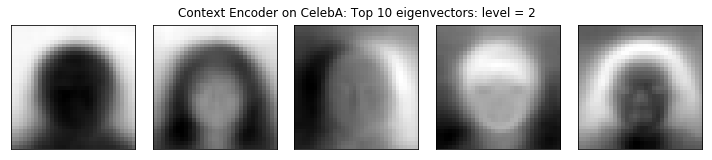

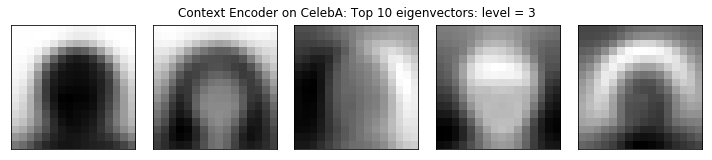

In [214]:
eig_val_vecs=pickle.load(open(recons_file,'rb'))
for level,_ in enumerate(eig_val_vecs):
    eig_vals = eig_val_vecs[level][0] 
    eig_vecs = eig_val_vecs[level][1] 
    images = eig_vecs[-5:] 
    images = np.flipud(images)
    plot_title = 'Context Encoder on CelebA: ' + 'Top 10 eigenvectors: level = ' +str(level)
    plot_image_grid(images,plot_title ,image_shape=eig_vecs[0].shape,nrows=1,ncols=5)


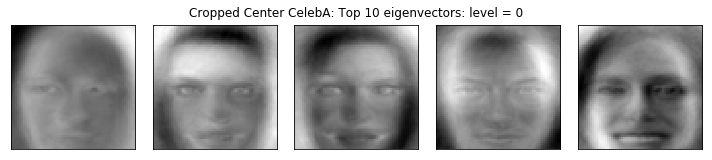

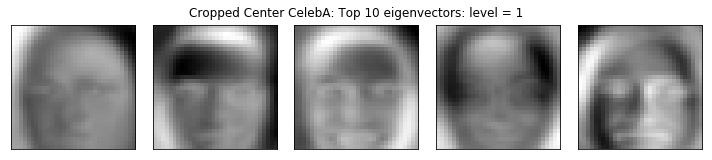

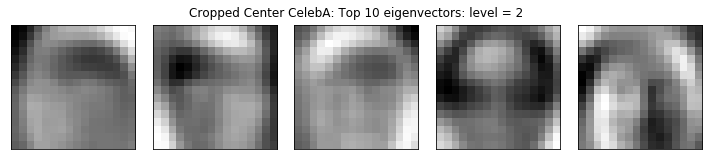

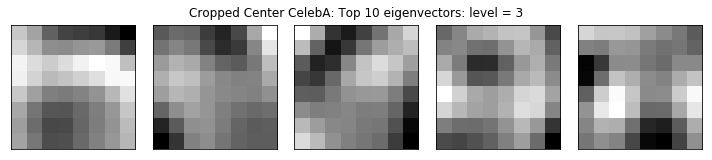

In [215]:
eig_val_vecs = pickle.load(open(orig_cropped_file,'rb'))
for level,_ in enumerate(eig_val_vecs):
    eig_vals = eig_val_vecs[level][0] 
    eig_vecs = eig_val_vecs[level][1] 
    images = eig_vecs[-10:] 
    images = np.flipud(images)
    plot_title = 'Cropped Center CelebA: ' + 'Top 10 eigenvectors: level = ' +str(level)
    plot_image_grid(-images,plot_title ,image_shape=eig_vecs[0].shape,nrows=1,ncols=5)


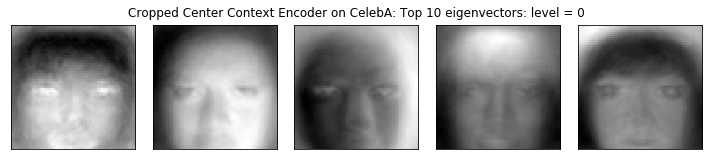

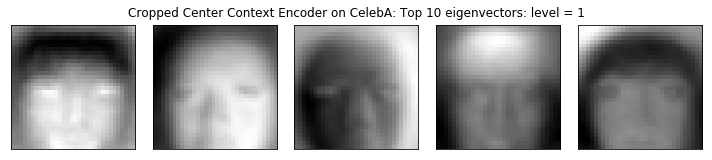

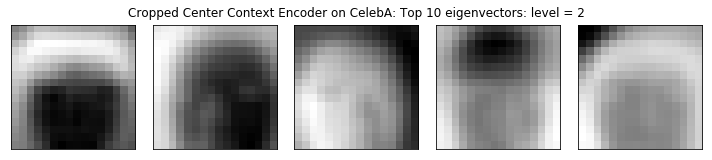

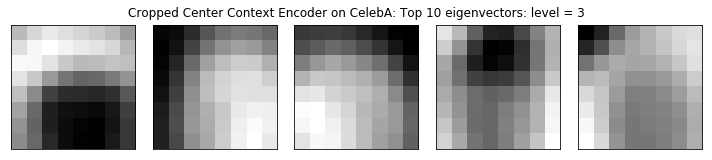

In [216]:
eig_val_vecs=pickle.load(open(recons_cropped_file,'rb'))
for level,_ in enumerate(eig_val_vecs):
    eig_vals = eig_val_vecs[level][0] 
    eig_vecs = eig_val_vecs[level][1] 
    images = eig_vecs[-5:] 
    images = np.flipud(images)
    plot_title = 'Cropped Center Context Encoder on CelebA: ' + 'Top 10 eigenvectors: level = ' +str(level)
    plot_image_grid(-images,plot_title ,image_shape=eig_vecs[0].shape,nrows=1,ncols=5)

# PCA Analysis

In [217]:
orig_cropped_eig=pickle.load(open(orig_cropped_file,'rb'))
recons_cropped_eig=pickle.load(open(recons_cropped_file,'rb'))

In [218]:
input_image_dir = '/scratch/awd275/context_encoder_pytorch_data/20200512_CE_output/'
original_images_path_list = []
for file in os.listdir(input_image_dir):
    if file.endswith("orig.png"):
        original_images_path_list.append(file)
original_images = [rgb2gray(plt.imread(input_image_dir+file)) for file in sorted(original_images_path_list)]
original_cropped = [image[32:(32+64), 32:(32+64)] for image in original_images]



reconstructed_images_path_list = []

for file in os.listdir(input_image_dir):
    if file.endswith("recons.png"):
        reconstructed_images_path_list.append(file)

recons_images = [rgb2gray(plt.imread(input_image_dir+file)) for file in sorted(reconstructed_images_path_list)]
recons_cropped = [image[32:(32+64), 32:(32+64)] for image in recons_images]

In [219]:
sorted(original_images_path_list)[6:10]

['120006_orig.png', '120007_orig.png', '120008_orig.png', '120009_orig.png']

### Level=0 (64x64)

In [220]:
orig_eig_vals = orig_cropped_eig[0][0]*(1/1000)
orig_eig_images = orig_cropped_eig[0][1]
recons_eig_vals = recons_cropped_eig[0][0]*(1/1000)
recons_eig_images = recons_cropped_eig[0][1]


In [221]:
sum(orig_eig_vals)

177.57896589375139

(64p x 64p) The total variance in the original images is 14638.

In [222]:
sum(recons_eig_vals)

152.12427369733382

In [223]:
sum(recons_eig_vals)/sum(orig_eig_vals)

0.85665705356315924

The total variance in the reconstructed images is 12271.

Now lets compare the variance captured in the first 10 eigenvectors for the original images and reconstructed images

In [224]:
orig_eig_vals[-10:]

array([  2.36806222,   3.10567372,   3.41540019,   3.78724797,
         5.01288808,   6.27063214,  11.33853354,  20.66916305,
        22.1047222 ,  45.55432715])

In [225]:
recons_eig_vals[-10:]

array([  2.06559165,   2.40554278,   2.72640596,   3.08955941,
         4.49200163,   5.41347549,   9.80624865,  19.08028496,
        19.44598158,  47.43108399])

We can see that the eigenvectors for the original images seem to capture more variance.

# Variance Captured graph

$EC= \frac{||Proj_{Q_r}(Im)||_2}{||Im||_2}$

In [226]:
def variance_captured(image_vec, eig_vecs): 
    return np.linalg.norm(eig_vecs@eig_vecs.T@image_vec)

In [227]:
orig_cumulative_var_captured=[sum(orig_eig_vals[-ii:]) for ii in range(1,len(orig_eig_vals))]

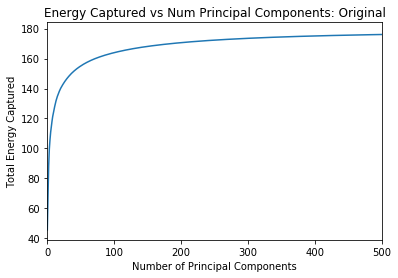

In [228]:
plt.plot(orig_cumulative_var_captured)
plt.title("Energy Captured vs Num Principal Components: Original")
plt.ylabel('Total Energy Captured')
plt.xlabel('Number of Principal Components')
plt.xlim([0,500])
plt.show()


In [229]:
recons_cumulative_var_captured=[sum(recons_eig_vals[-ii:]) for ii in range(1,len(recons_eig_vals))]

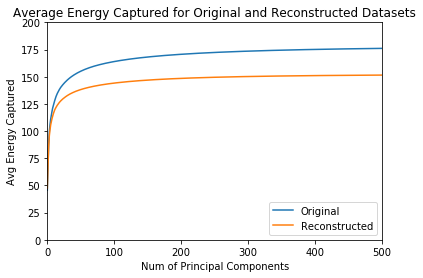

In [230]:
plt.plot(orig_cumulative_var_captured,label="Original")
plt.plot(recons_cumulative_var_captured,label="Reconstructed")
plt.title("Average Energy Captured for Original and Reconstructed Datasets")
plt.ylabel('Avg Energy Captured')
plt.xlabel('Num of Principal Components')
plt.legend(loc='lower right')
plt.xlim([0,500])
plt.ylim([0,200])
plt.show()

plt.savefig(graphs_dir +'Average Energy Captured.pdf',bbox_inches='tight')


# Energy capture of individual images

In [238]:
cum_compressed_var_captured=[]
orig_total_dataset_var = sum(orig_eig_vals)

n_dim=500
num_pix = orig_eig_images[0].shape[0]*orig_eig_images[0].shape[1]
image_eig_vecs = np.zeros((num_pix,n_dim))

#Unravel original eigenvecs
for ii,eig_image in enumerate(reversed(orig_eig_images[-n_dim:])):
    image_eig_vecs[:,ii] = unravel_image(eig_image)


In [266]:
var_captured_list=[]
num_images=1000
num_eig_vecs=500
perc_energy_matrix = np.zeros((num_images,num_eig_vecs))
# Compressed image for loop
for ii,image in enumerate(recons_cropped[0:num_images]):
    image_vec = unravel_image(image)
    eig_coef = image_eig_vecs[:,:num_eig_vecs].T@image_vec
    cum_coef = np.sqrt(np.cumsum(np.multiply(eig_coef,eig_coef)))
    perc_energy_captured = cum_coef/(np.linalg.norm(image_vec))
    perc_energy_matrix[ii,:] = perc_energy_captured


In [267]:
print(perc_energy_matrix.shape)
avg_perc_energy_cap = np.mean(perc_energy_matrix,axis=0)
avg_perc_energy_cap = avg_perc_energy_cap

(1000, 500)


In [268]:
avg_perc_energy_cap.shape

(500,)

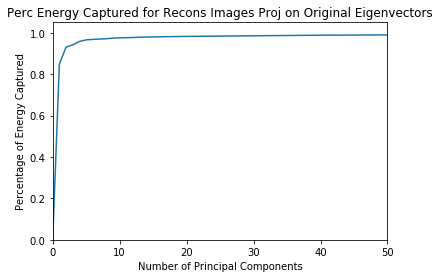

In [302]:
plt.plot(list(range(501)),[0] + list(avg_perc_energy_cap))
plt.title("Perc Energy Captured for Recons Images Proj on Original Eigenvectors")
plt.ylabel('Percentage of Energy Captured')
plt.xlabel('Number of Principal Components')
plt.xlim([0,50])
plt.ylim([0,1.05])
plt.show()
plt.savefig(graphs_dir +'Reconstructed Perc Energy Cap.pdf',bbox_inches='tight')


In [305]:
print(avg_perc_energy_cap[10])
print(avg_perc_energy_cap[50])
print(avg_perc_energy_cap[100])
print(avg_perc_energy_cap[250])
print(avg_perc_energy_cap[499])


0.975912307565
0.989532386186
0.993103682549
0.99602983261
0.997482699927


In [298]:
avg_perc_energy_cap[10]

0.97591230756472291

compressed_image_energy_list

## Now, lets plot some eigenfaces for PCA-reduced images

In [ ]:
orig_cropped_eig=pickle.load(open(orig_cropped_file,'rb'))
recons_cropped_eig=pickle.load(open(recons_cropped_file,'rb'))


### Image Comparisons for 25,50,100,250, and 500 dimensions

In [351]:
n_dim=500
#First, we need to unravel our eigenvector images

num_pix_per_side = orig_eig_images[0].shape[0]
num_pix = orig_eig_images[0].shape[0]*orig_eig_images[0].shape[1]
image_eig_vecs = np.zeros((num_pix,n_dim))

for ii,eig_image in enumerate(reversed(orig_eig_images[-n_dim:])):
    image_eig_vecs[:,ii] = unravel_image(eig_image)
#Now,we unravel each !reconstructed! cropped image, and then project onto the eigenvectors
recons_cropped_compressed_25 = []  
recons_cropped_compressed_50 = []
recons_cropped_compressed_100 = []
recons_cropped_compressed_250 = []
recons_cropped_compressed_500 = []

for image in recons_cropped[0:50]:
    image_vec = unravel_image(image)
    
    vec_reduced_25 = project_onto_eig_vecs(image_vec,image_eig_vecs[:,:25])
    recons_cropped_compressed_25.append(ravel_image_vec(vec_reduced_25,num_pix_per_side))

    vec_reduced_50 = project_onto_eig_vecs(image_vec,image_eig_vecs[:,:50])
    recons_cropped_compressed_50.append(ravel_image_vec(vec_reduced_50,num_pix_per_side))
    
    vec_reduced_100 = project_onto_eig_vecs(image_vec,image_eig_vecs[:,:100])
    recons_cropped_compressed_100.append(ravel_image_vec(vec_reduced_100,num_pix_per_side))
    
    vec_reduced_250 = project_onto_eig_vecs(image_vec,image_eig_vecs[:,:250])
    recons_cropped_compressed_250.append(ravel_image_vec(vec_reduced_250,num_pix_per_side))
    
    vec_reduced_500 = project_onto_eig_vecs(image_vec,image_eig_vecs[:,:500])
    recons_cropped_compressed_500.append(ravel_image_vec(vec_reduced_500,num_pix_per_side))
   

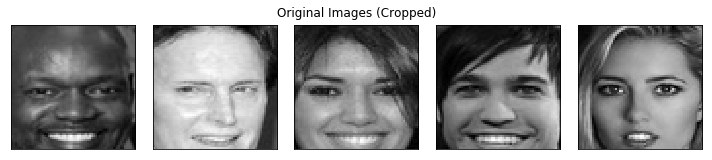

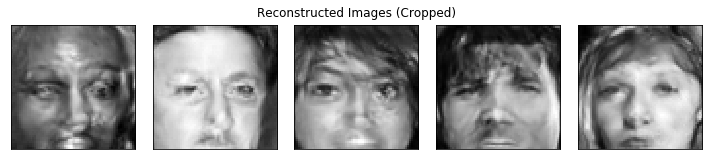

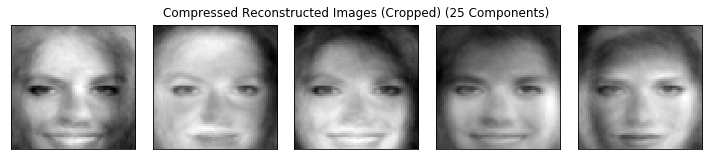

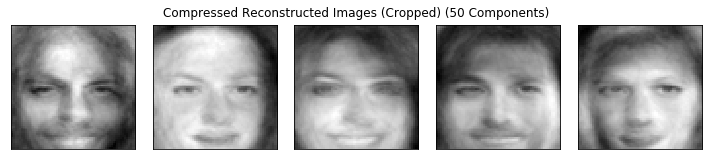

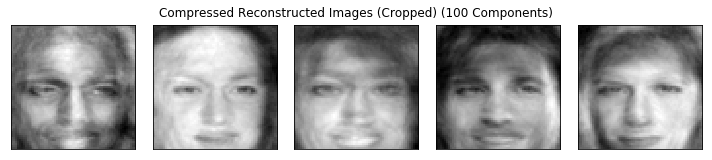

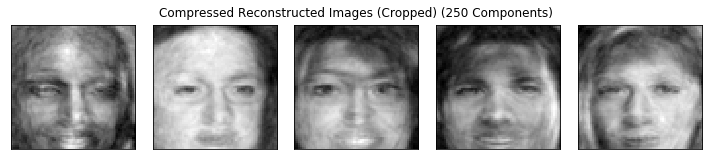

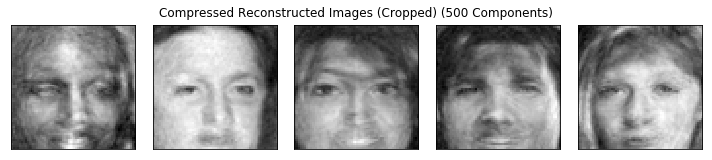

In [356]:
###########
idx1 = 40
idx2 = 45

###########
plot_title='Original Images (Cropped)'
plot_image_grid(original_cropped[idx1:idx2],plot_title,
                image_shape=original_cropped[0].shape,
                ncols=5,
                nrows=1
               )
plt.show()
plt.savefig(graphs_dir + plot_title,bbox_inches='tight')

plot_title='Reconstructed Images (Cropped)'
plot_image_grid(recons_cropped[idx1:idx2],plot_title,
                image_shape=recons_cropped[0].shape,
                ncols=5,
                nrows=1
               )
plt.show()
plt.savefig(graphs_dir + plot_title,bbox_inches='tight')

plot_title='Compressed Reconstructed Images (Cropped) (25 Components)'
plot_image_grid(recons_cropped_compressed_25[idx1:idx2],plot_title,
                image_shape=recons_cropped_compressed_25[0].shape,
                ncols=5,
                nrows=1
               )
plt.show()
plt.savefig(graphs_dir + plot_title,bbox_inches='tight')

plot_title='Compressed Reconstructed Images (Cropped) (50 Components)'
plot_image_grid(recons_cropped_compressed_50[idx1:idx2],plot_title,
                image_shape=recons_cropped_compressed_50[0].shape,
                ncols=5,
                nrows=1
               )
plt.show()
plt.savefig(graphs_dir + plot_title,bbox_inches='tight')

plot_title='Compressed Reconstructed Images (Cropped) (100 Components)'
plot_image_grid(recons_cropped_compressed_100[idx1:idx2],plot_title,
                image_shape=recons_cropped_compressed_100[0].shape,
                ncols=5,
                nrows=1
               )
plt.show()
plt.savefig(graphs_dir + plot_title,bbox_inches='tight')

plot_title='Compressed Reconstructed Images (Cropped) (250 Components)'
plot_image_grid(recons_cropped_compressed_250[idx1:idx2],plot_title,
                image_shape=recons_cropped_compressed_250[0].shape,
                ncols=5,
                nrows=1
               )
plt.show()
plt.savefig(graphs_dir + plot_title,bbox_inches='tight')

plot_title='Compressed Reconstructed Images (Cropped) (500 Components)'
plot_image_grid(recons_cropped_compressed_500[idx1:idx2],plot_title,
                image_shape=recons_cropped_compressed_500[0].shape,
                ncols=5,
                nrows=1
               )
plt.show()
plt.savefig(graphs_dir + plot_title,bbox_inches='tight')


# Rescaling Analysis

There are three things we will compare:
    - 1. Original-cropped dataset eigenvectors: 64x64 
    - 2. Original-cropped dataset eigenvectors: 64x64 resized to 32x32 via gaussian pyramid, then 32x32 eigenvectors computed
    - 3. Reconstructed-cropped dataset eigenvectors: 64x64 resized to 32x32
    

In [333]:
def resize_image_in_half(image):
    output_image = np.zeros((int(image.shape[0]/2),int(image.shape[1]/2)))
    for ii in range(int(image.shape[0]/2)):
        for jj in range(int(image.shape[1]/2)):
            output_image[ii,jj] = (image[2*ii,2*jj] +
                                   image[2*ii+1,2*jj] + 
                                   image[2*ii,2*jj+1] + 
                                   image[2*ii+1,2*jj+1]
                                  )/4
    return output_image
    

In [334]:
orig_cropped_eig=pickle.load(open(orig_cropped_file,'rb'))
recons_cropped_eig=pickle.load(open(recons_cropped_file,'rb'))

input_image_dir = '/scratch/awd275/context_encoder_pytorch_data/20200512_CE_output/'
original_images_path_list = []
for file in os.listdir(input_image_dir):
    if file.endswith("orig.png"):
        original_images_path_list.append(file)
original_images = [rgb2gray(plt.imread(input_image_dir+file)) for file in sorted(original_images_path_list)]
original_cropped = [image[32:(32+64), 32:(32+64)] for image in original_images]

reconstructed_images_path_list = []

for file in os.listdir(input_image_dir):
    if file.endswith("recons.png"):
        reconstructed_images_path_list.append(file)

recons_images = [rgb2gray(plt.imread(input_image_dir+file)) for file in sorted(reconstructed_images_path_list)]
recons_cropped = [image[32:(32+64), 32:(32+64)] for image in recons_images]

### Cosine similarity of principal eigenvectors

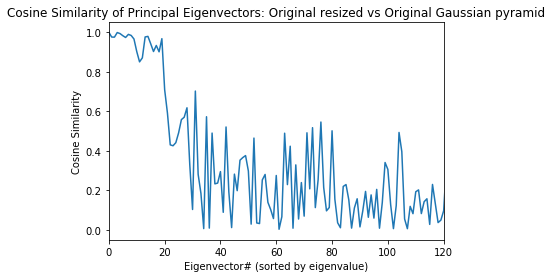

In [335]:
orig_cropped_eig_images_64 = orig_cropped_eig[0][1]
orig_cropped_eig_images_32 = orig_cropped_eig[1][1]
similarity_list = []
for ii in range(1,500):
    #Original cropped dataset vector
    first_eig_image_64 = orig_cropped_eig_images_64[-ii]
    first_eig_image_32_resized = resize_image_in_half(first_eig_image_64) 
    # Need to rescale after resizing
    first_eig_image_32_resized = first_eig_image_32_resized*1/np.linalg.norm(first_eig_image_32_resized) #eigenvector after resizing
    
    first_eig_image_32 = orig_cropped_eig_images_32[-ii] # eigenvector after gaussian pyramid

    #Now, unravel and compute similarity
    first_eig_vec_32_resized = unravel_image(first_eig_image_32_resized)
    first_eig_vec_32 = unravel_image(first_eig_image_32)
    
    similarity = np.abs(first_eig_vec_32@first_eig_vec_32_resized)
    similarity_list.append(similarity)
plt.plot(similarity_list)
plt.title("Cosine Similarity of Principal Eigenvectors: Original resized vs Original Gaussian pyramid")
plt.ylabel('Cosine Similarity')
plt.xlabel('Eigenvector# (sorted by eigenvalue)')
plt.xlim([0,120])
plt.show()


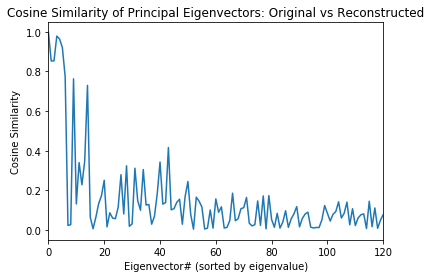

In [349]:
orig_cropped_eig_images_64 = orig_cropped_eig[0][1]
recons_cropped_eig_images_32 = recons_cropped_eig[1][1]
similarity_list = []
for ii in range(1,500):
    #Original cropped dataset vector
    first_eig_image_64 = orig_cropped_eig_images_64[-ii]
    first_eig_image_32_resized = resize_image_in_half(first_eig_image_64) 
    # Need to rescale after resizing
    first_eig_image_32_resized = first_eig_image_32_resized*1/np.linalg.norm(first_eig_image_32_resized) #eigenvector after resizing
    
    recons_eig_image_32 = recons_cropped_eig_images_32[-ii] # eigenvector after gaussian pyramid

    #Now, unravel and compute similarity
    first_eig_vec_32_resized = unravel_image(first_eig_image_32_resized)
    recons_eig_vec_32 = unravel_image(recons_eig_image_32)
    
    similarity = np.abs(recons_eig_vec_32@first_eig_vec_32_resized)
    similarity_list.append(similarity)
plt.plot(similarity_list)
plt.title("Cosine Similarity of Principal Eigenvectors: Original vs Reconstructed")
plt.ylabel('Cosine Similarity')
plt.xlabel('Eigenvector# (sorted by eigenvalue)')
plt.xlim([0,120])
plt.show()
plt.savefig(graphs_dir +'Cosine Similarity of Principal Eigenvectors.pdf',bbox_inches='tight')

In [337]:
first_eig_image_64.shape

(64, 64)

In [338]:
second_eig_image_64.shape

NameError: name 'second_eig_image_64' is not defined

In [ ]:
plot_image_grid(orig_cropped_eig_image_64[-10:],'test',image_shape=original_cropped_compressed[0].shape)

In [ ]:
n_dim=1000
orig_cropped_eig_image_64[0]
#First, we need to unravel our !original! eigenvector images

num_pix_per_side = orig_eig_images[0].shape[0]
num_pix = orig_eig_images[0].shape[0] * orig_eig_images[0].shape[1]

image_eig_vecs = np.zeros((num_pix,n_dim))
for ii,eig_image in enumerate(orig_eig_images[-n_dim:]):
    image_eig_vecs[:,ii] = unravel_image(eig_image)

    
#Now,we unravel each !reconstructed! cropped image, and then project onto the eigenvectors
recons_cropped_compressed = []   
for image in recons_cropped:
    image_vec = unravel_image(image)
    vec_reduced = project_onto_eig_vecs(image_vec,image_eig_vecs)
    recons_cropped_compressed.append(ravel_image_vec(vec_reduced,num_pix_per_side))

plot_title='Ten original images'
plot_image_grid(original_cropped[0:10],plot_title,
                image_shape=original_cropped_compressed[0].shape,
                n_col=5,
                n_row=2
               )
plt.show()    

plot_title='Ten reconstructed images'
plot_image_grid(recons_cropped[0:10],plot_title,
                image_shape=original_cropped_compressed[0].shape,
                n_col=5,
                n_row=2
               )
plt.show()

plot_title='Ten compressed reconstructed images'
plot_image_grid(recons_cropped_compressed[0:10],plot_title,
                image_shape=original_cropped_compressed[0].shape,
                n_col=5,
                n_row=2
               )
plt.show()
